In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import datetime as dt
import pandas_datareader.data as web
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor

In [24]:
def get_data(lusip):
    start = dt.datetime(2018, 1, 1)
    end = dt.datetime.now()
    df = web.DataReader(lusip,'yahoo', start, end)
    df.to_csv(lusip+'.csv')

In [25]:
get_data('RELIANCE.NS')

In [26]:

pd.read_csv('RELIANCE.NS.csv').shape

(854, 7)

In [27]:
def data_preprocessing(ticker):
    training_data = pd.read_csv('{}.csv'.format(ticker))
    training_data = training_data.dropna()
    training_data = training_data[['Open', 'High', 'Low', 'Date', 'Volume', 'Adj Close','Close']]

    training_data['H-L'] = training_data['High'] - training_data['Low']
    training_data['O-C'] = training_data['Close'] - training_data['Open']
    
    training_data['ma_5'] = training_data['Close'].rolling(window=5).mean()
    training_data['ma_10'] = training_data['Close'].rolling(window=10).mean() 
    
    training_data['EWMA_12'] = training_data['Close'].ewm(span=12).mean() #Providing exponential weighted (EW) functions #Specify decay

    training_data['std_5'] = training_data['Close'].rolling(window=5).std()
    training_data['std_10'] = training_data['Close'].rolling(window=10).std()


    training_data[["year","month", "day",]] = training_data["Date"].str.split("-", expand = True)
    training_data = training_data.drop(['Date'], axis = 1)
    training_data.day = training_data.day.astype('int64')
    training_data.month = training_data.month.astype('int64')
    training_data.year = training_data.year.astype('int64')

    training_data['Price_Rise'] = np.where(training_data['Close'].shift(-1) > training_data['Close'], 1, 0)
    training_data.columns
    training_data = training_data.dropna()
    y = training_data['Price_Rise']
    training_data = training_data.drop(['Price_Rise'], axis = 1)
    X = training_data
    split = int(len(training_data)*0.8)
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test, y_train, y_test


In [28]:
data_preprocessing('RELIANCE.NS')

(array([[-1.12173966, -1.12795185, -1.10052068, ..., -1.17740636,
         -1.58403883, -0.44221773],
        [-1.1015159 , -1.11169093, -1.08015208, ..., -1.17740636,
         -1.58403883, -0.09900397],
        [-1.10816097, -1.14250111, -1.15400633, ..., -1.17740636,
         -1.58403883,  0.01540062],
        ...,
        [ 2.67219868,  2.65008853,  2.73609728, ...,  1.32550779,
          1.15772283, -0.44221773],
        [ 2.65936638,  2.73648345,  2.73491417, ...,  1.32550779,
          1.15772283, -0.32781315],
        [ 2.80023259,  2.78904036,  2.86109407, ...,  1.32550779,
          1.15772283, -0.21340856]]),
 array([[ 2.83260598,  2.74872273,  2.64364404, ...,  1.32550779,
          1.15772283, -0.09900397],
        [ 2.61386874,  2.58313247,  2.57752118, ...,  1.32550779,
          1.15772283,  0.01540062],
        [ 2.5411023 ,  2.57218898,  2.52574737, ...,  1.32550779,
          1.15772283,  0.35861438],
        ...,
        [ 2.64449196,  2.59033205,  2.61213626, ...,  

accuracy: 0.4970414201183432
predicted class counts: Counter({0: 114, 1: 55})


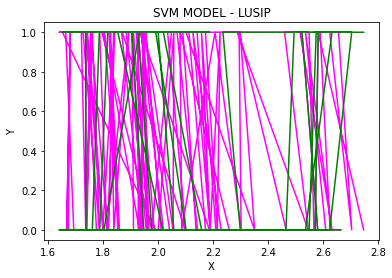

In [29]:

def svm_linear(ticker):
  X_train, X_test, y_train, y_test = data_preprocessing(ticker)
  clf = svm.SVC(kernel = 'linear')
  clf.fit(X_train, y_train)
  confidence = clf.score(X_test, y_test)
  print('accuracy:',confidence)
  predictions = clf.predict(X_test)
  print('predicted class counts:',Counter(predictions))


  plt.plot(X_test[:,1], y_test, color = 'magenta')
  plt.plot(X_test[:,1], predictions, color = 'green')
  plt.title('SVM MODEL - LUSIP')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

svm_linear('RELIANCE.NS')


In [30]:
def svm_poly(ticker):
    X_train, X_test, y_train, y_test = data_preprocessing(ticker)
    clf = svm.SVC(kernel = 'poly')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    
svm_poly('RELIANCE.NS')

accuracy: 0.46153846153846156
predicted class counts: Counter({1: 89, 0: 80})


In [31]:
from sklearn.model_selection import train_test_split
def data_preprocessing_RF(ticker):
    training_data = pd.read_csv('{}.csv'.format(ticker))
    training_data = training_data.dropna()
    training_data = training_data[['Open', 'High', 'Low', 'Date', 'Volume', 'Adj Close','Close']]

    #training_data['H-L'] = training_data['High'] - training_data['Low']
    #training_data['O-C'] = training_data['Close'] - training_data['Open']
    
    #training_data['ma_5'] = training_data['Close'].rolling(window=5).mean()
    #training_data['ma_10'] = training_data['Close'].rolling(window=10).mean() 
    
    #training_data['EWMA_12'] = training_data['Close'].ewm(span=12).mean() #Providing exponential weighted (EW) functions #Specify decay

    #training_data['std_5'] = training_data['Close'].rolling(window=5).std()
    #training_data['std_10'] = training_data['Close'].rolling(window=10).std()


    training_data[["year","month", "day",]] = training_data["Date"].str.split("-", expand = True)
    training_data = training_data.drop(['Date'], axis = 1)
    training_data.day = training_data.day.astype('int64')
    training_data.month = training_data.month.astype('int64')
    training_data.year = training_data.year.astype('int64')

    #training_data['Price_Rise'] = np.where(training_data['Close'].shift(-1) > training_data['Close'], 1, 0)
    training_data = training_data.dropna()
    target = training_data['Close']
    training_data = training_data.drop(['Close'], axis = 1)
    X = training_data
    feature_list = list(training_data.columns) 
    X = np.array(X)
    y = np.array(target)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


    return training_data,target, X_train, X_test, y_train, y_test, feature_list


In [32]:
features, labels, train_features, test_features, train_labels, test_labels,feature_list = data_preprocessing_RF('RELIANCE.NS')
features.describe()

,Open,High,Low,Volume,Adj Close,year,month,day
count,854.000000,854.000000,854.000000,8.540000e+02,854.000000,854.000000,854.000000,854.000000
mean,1454.543159,1472.321206,1435.239215,1.151072e+07,1441.586626,2019.276347,6.074941,15.676815
std,421.262755,425.857282,415.029981,8.045175e+06,423.153104,1.024199,3.440195,8.749932
min,868.764954,887.437988,862.821289,1.296168e+06,858.272034,2018.000000,1.000000,1.000000
25%,1116.293610,1128.552460,1100.022858,6.539625e+06,1104.036438,2018.000000,3.000000,8.000000
50%,1324.445557,1341.137329,1308.595825,9.089370e+06,1305.252747,2019.000000,6.000000,16.000000
75%,1924.000000,1941.424957,1899.975006,1.375731e+07,1913.020966,2020.000000,9.000000,23.000000
max,2325.000000,2369.350098,2310.550049,6.584835e+07,2317.096191,2021.000000,12.000000,31.000000


In [33]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [34]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.59 degrees.


In [35]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.8 %.


In [36]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Adj Close            Importance: 0.41
Variable: Low                  Importance: 0.26
Variable: High                 Importance: 0.25
Variable: Open                 Importance: 0.08
Variable: Volume               Importance: 0.0
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0


In [37]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('High'), feature_list.index('Adj Close'), feature_list.index('Low')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

rf_most_important.fit(train_important, train_labels)

predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.41 degrees.
Accuracy: 99.82 %.


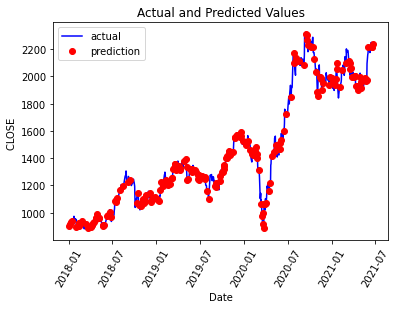

In [38]:
import datetime
#predictions
months = features['month']
days = features['day']
years = features['year']
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})


plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
##main graph
plt.xlabel('Date'); plt.ylabel('CLOSE '); plt.title('Actual and Predicted Values');